Please **submit this Jupyter notebook through Canvas** no later than **Friday December 14, 10:59**, before the start of the lecture.

The final project is in **groups of three**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

A single, jointly written report for each group is fine. All members in a group will receive the same grade.

# Exercise 0
Write down the names + student ID of the people in your group.

----
# Project keywords
Optimization, time integration

----
# Project description
In various fields of application (e.g. physics, chemistry, biology), modeling systems as noise-driven motion in a potential landscape has been very successful. Such systems can spend most of their time in or near the bottom of a potential well, and are occasionally triggered by the noise to "hop over" to another well. How frequently such transitions occur depends on the noise amplitude. With small noise, transitions occur very infrequently ("rare events"), and the potential wells correspond to preferred states or metastable states of the system. Think of the phenomenon of protein folding, with the folded and unfolded states as metastable states.

If the noise is small and the potential smooth, transitions typically follow \textit{minimum energy paths}. An important question is what these paths look like. Answering this question by forward time integration is impractical or even impossible if the transitions are rare (in which case excessively long integrations would be needed to observe just one or a few transitions). Instead, one can try to compute the paths directly using minimization.

The following potential, with $(x_1,x_2) = \mathbf{x} \in \mathbb{R}^2$, is frequently used in this context:
$$V(x_1,x_2) = \sum_{i=1}^4 A_i \, \exp \left( a_i(x_1-\bar x_1^{(i)})^2 + b_i(x_1-\bar x_1^{(i)})(x_2-\bar x_2^{(i)} ) + c_i (x_2-\bar x_2^{(i)})^2 \right)$$
with constants 
$$\{A_i \}=(-200,-100,-170,15), \{a_i \} = (-1, -1, -6.5, 0.7), \{ b_i \}=(0, 0, 11, 0.6), $$
$$\{ c_i \} = (-10, -10, -6.5, 0.7), \{ \bar x_1^{(i)} \} = (1, 0, -0.5, -1), \{ \bar x_2^{(i)} \} = (0, 0.5, 1.5, 1).$$

This potential has three local minima, these can be found by minimization. If we have two states $\mathbf{A}$ and $\mathbf{B}$ and we want to compute the minimum energy path that connects them, we can create a chain of $N+1$ states $\{ \mathbf{x}_0, \mathbf{x}_1, ..., \mathbf{x}_N \}$ with $\mathbf{x}_0=\mathbf{A}$ and $\mathbf{x}_N=\mathbf{B}$, and define the energy of the chain as
$$E(\mathbf{x}_0, \mathbf{x}_1, ..., \mathbf{x}_N) = \sum_{j=0}^N V(\mathbf{x}_j) + \frac12 k \sum_{j=1}^N \| \mathbf{x}_j-\mathbf{x}_{j-1} \|_2^2.$$

By minimizing $E$ over the coordinates of the states $\mathbf{x}_1, ..., \mathbf{x}_{N-1}$, we can approximate the minimum energy path as the path $\mathbf{x}_0 \rightarrow \mathbf{x}_1 \rightarrow ... \rightarrow \mathbf{x}_{N}$. This method is sometimes referred to as the "elastic band" method.

----
# Project exercises

## Exercise 1
Read section 6.5 from the book by Heath.

## Exercise 2
Locate the minima of the potential $V$ by minimization. Discuss the algorithm that you use for this.

$\mathbf{x} \in \mathbb{R}^2$, is frequently used in this context:
$$V(x_1,x_2) = \sum_{i=1}^4 A_i \, \exp \left( a_i(x_1-\bar x_1^{(i)})^2 + b_i(x_1-\bar x_1^{(i)})(x_2-\bar x_2^{(i)} ) + c_i (x_2-\bar x_2^{(i)})^2 \right)$$

with constants 

$$\{A_i \}=(-200,-100,-170,15), \{a_i \} = (-1, -1, -6.5, 0.7), \{ b_i \}=(0, 0, 11, 0.6), $$
$$\{ c_i \} = (-10, -10, -6.5, 0.7), \{ \bar x_1^{(i)} \} = (1, 0, -0.5, -1), \{ \bar x_2^{(i)} \} = (0, 0.5, 1.5, 1).$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

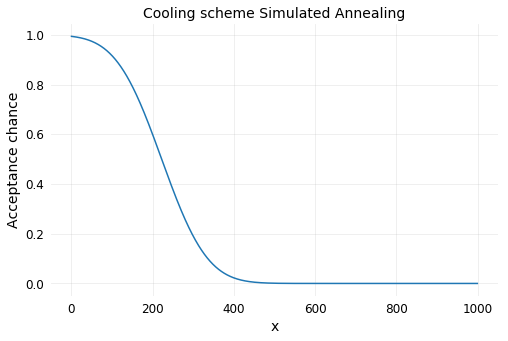

IndexError: invalid index to scalar variable.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math


A = [-200, -100, -170, 15]
a = [-1, -1, -6.5, 0.7]
b = [0, 0, 11, 0.6]
c = [-10, -10, -6.5, 0.7]
xbar1 = [1, 0, -0.5, -1]
xbar2 = [0, 0.5, 1.5, 1]

xmin = -2
xmax = 2
ymin = -2
ymax = 2
stepRate = math.pow(10, -4)
stepSize = (abs(xmin) + abs(xmax)) * stepRate
deltav_x1=[]
deltav_x2=[]



def prettyfie(ax, x, y, title, legendYN="Yes"):

    # Remove borders
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.grid(alpha=0.25)

    # Remove unnecessary ticks
    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        top=False,
        labelbottom=True,
        left=False,
        right=False,
        labelleft=True)

    if legendYN == "Yes":
        # Create legend and grid
        ax.legend(framealpha=1, shadow=True)
        ax.legend()

    # Set labels and title
    ax.set_xlabel(x, fontsize=14)
    ax.set_ylabel(y, fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)


def Vx(x1, x2, A, a, b, C, xbar1, xbar2):
    return np.sum([
        A[i] * np.exp((a[i] * (x1 - xbar1[i])**2) + (b[i] * (x1 - xbar1[i])) *
                      (x2 - xbar2[i]) + C[i] * (x2 - xbar2[i])**2)
        for i in range(len(A))
    ])

def Vx2(x1, x2, A, a, b, C, xbar1, xbar2):
    return np.sum([
        A[q] * (2*(a[q]*(x1-xbar1[q]))+b[q]*(x2-xbar2[q])) * np.exp((a[q] * (x1 - xbar1[q])**2) + (b[q] * 
                    (x1 - xbar1[q])) *(x2 - xbar2[q]) + C[q] * (x2 - xbar2[q])**2)
        for q in range(len(A))
    ])

def Vx3(x1, x2, A, a, b, C, xbar1, xbar2):
    return np.sum([
        A[q]* (2*(c[q]*(x2-xbar2[q]))+b[q]*(x1-xbar1[q])) * np.exp((a[q] * (x1 - xbar1[q])**2) + (b[q] 
                                                * (x1 - xbar1[q])) *(x2 - xbar2[q]) + C[q] * (x2 - xbar2[q])**2)
        for q in range(len(A))
    ])


def getScheme_data(iters, plot="No"):
    linspace = np.linspace(0, 9, iters)
    answer = []

    for x in linspace:
        answer.append(0.5 +
                      math.erf((math.sqrt(math.pi) / 2) * (x - 2)) * -0.5)

    if plot == "Yes":
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        ax.plot(answer, label="Acceptance chance")
        prettyfie(
            ax,
            "x",
            "Acceptance chance",
            "Cooling scheme Simulated Annealing",
            legendYN="No")
        plt.show()
    return answer

def gradient_descent(collectx):
    k=50
    tol=0.001
    temp=[]
    counter=0
    for j in range(k):
        for i in collectx:
            counter=counter+1
            approx=1
            minima=collectx[-1]
            deltav_x1 = Vx2(i[0], i[1], A, a, b, c, xbar1, xbar2)
            deltav_x2 = Vx3(i[0], i[1], A, a, b, c, xbar1, xbar2)
            grad_x1= deltav_x1 + (k/2)*(i[0] - collectx[counter-1][0])
            grad_x2= deltav_x2 + (k/2)*(i[1] - collectx[counter-1][1])
            temp.append(grad_x1)
            temp.append(grad_x2)
            if np.all(np.isclose(i,minima,tol)) == True:
                break
        collectx=temp
        
    print bestx
# HIER KOMT GRADIENT DESCENT


def pickXX(x1, x2):

    tx1 = x1 + np.random.uniform(-stepSize, stepSize)
    tx2 = x2 + np.random.uniform(-stepSize, stepSize)
    if xmin > tx1 > xmax or xmin > tx2 > xmax:
        return pickXX(x1, x2)
    return tx1, tx2


def optim(iters,
          xmin,
          xmax,
          ymin,
          ymax,
          typeO,
          stepSize,
          plotRun="No",
          schemePlot="No"):
    x1 = np.random.uniform(xmin, xmax)
    x2 = np.random.uniform(ymin, ymax)
    score = Vx(x1, x2, A, a, b, c, xbar1, xbar2)
    bestX = (x1, x2)
    collectx =[]
    
    # Set plot to see cooling scheme
    if typeO == "SimAn": scheme = getScheme_data(iters, plot=schemePlot)
    run = [score]

    for i in range(iters):
        x1 = np.random.uniform(xmin, xmax)
        x2 = np.random.uniform(xmin, xmax)
        tmpScore = Vx(x1, x2, A, a, b, c, xbar1, xbar2)
        xcomb=(x1,x2)
        collectx.append(xcomb)

        if score > tmpScore:
            score = tmpScore
            bestX = (x1, x2)
            run.append(score)
        elif typeO == "SimAn":
            if scheme[i] > np.random.uniform():
                score = tmpScore
                bestX = (x1, x2)
                run.append(score)
    gradient_descent(collectx)

    if plotRun == "Yes":
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        ax.plot(run)
        prettyfie(
            ax,
            "iteration",
            "Score",
            "Score throughout the simulation",
            legendYN="No")
        plt.show()

    return score, bestX


print(
    optim(
        1000,
        xmin,
        xmax,
        ymin,
        ymax,
        "SimAn",
        stepSize,
        plotRun="Yes",
        schemePlot="Yes"))

